In [44]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import plotly.express as px
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)


In [2]:
resale_2017 = pd.read_csv('ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv')

In [3]:
resale_2017.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [4]:
resale_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159483 entries, 0 to 159482
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                159483 non-null  object 
 1   town                 159483 non-null  object 
 2   flat_type            159483 non-null  object 
 3   block                159483 non-null  object 
 4   street_name          159483 non-null  object 
 5   storey_range         159483 non-null  object 
 6   floor_area_sqm       159483 non-null  float64
 7   flat_model           159483 non-null  object 
 8   lease_commence_date  159483 non-null  int64  
 9   remaining_lease      159483 non-null  object 
 10  resale_price         159483 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 13.4+ MB


### Checking for Null Values

In [5]:
resale_2017.isnull().any()

month                  False
town                   False
flat_type              False
block                  False
street_name            False
storey_range           False
floor_area_sqm         False
flat_model             False
lease_commence_date    False
remaining_lease        False
resale_price           False
dtype: bool

In [6]:
resale_2015 = pd.read_csv('ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv')

In [7]:
resale_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37153 entries, 0 to 37152
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                37153 non-null  object 
 1   town                 37153 non-null  object 
 2   flat_type            37153 non-null  object 
 3   block                37153 non-null  object 
 4   street_name          37153 non-null  object 
 5   storey_range         37153 non-null  object 
 6   floor_area_sqm       37153 non-null  float64
 7   flat_model           37153 non-null  object 
 8   lease_commence_date  37153 non-null  int64  
 9   remaining_lease      37153 non-null  int64  
 10  resale_price         37153 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 3.1+ MB


In [8]:
resale_2015.isnull().any()

month                  False
town                   False
flat_type              False
block                  False
street_name            False
storey_range           False
floor_area_sqm         False
flat_model             False
lease_commence_date    False
remaining_lease        False
resale_price           False
dtype: bool

In [9]:
resale_2012 = pd.read_csv('ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv')

In [10]:
resale_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52203 entries, 0 to 52202
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                52203 non-null  object 
 1   town                 52203 non-null  object 
 2   flat_type            52203 non-null  object 
 3   block                52203 non-null  object 
 4   street_name          52203 non-null  object 
 5   storey_range         52203 non-null  object 
 6   floor_area_sqm       52203 non-null  float64
 7   flat_model           52203 non-null  object 
 8   lease_commence_date  52203 non-null  int64  
 9   resale_price         52203 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.0+ MB


In [11]:
resale_2012.isnull().any()

month                  False
town                   False
flat_type              False
block                  False
street_name            False
storey_range           False
floor_area_sqm         False
flat_model             False
lease_commence_date    False
resale_price           False
dtype: bool

Datasets Before 2012 does not contain least remaining date. The HDB Lease of 99 years begun in 1967, according to HDB. <br> https://www.gov.sg/article/do-i-really-own-my-hdb-flat#:~:text=Since%201967%2C%20all%20sites%20for,your%20loved%20ones%20for%20life. 
<br> Hence it is safe to assume that we are able to calculate the lease_remaining on dataset that are missing that column

In [12]:
resale_1990 = pd.read_csv('ResaleFlatPricesBasedonApprovalDate19901999.csv')

In [13]:
resale_1990.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200


In [14]:
resale_1990.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287196 entries, 0 to 287195
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                287196 non-null  object 
 1   town                 287196 non-null  object 
 2   flat_type            287196 non-null  object 
 3   block                287196 non-null  object 
 4   street_name          287196 non-null  object 
 5   storey_range         287196 non-null  object 
 6   floor_area_sqm       287196 non-null  float64
 7   flat_model           287196 non-null  object 
 8   lease_commence_date  287196 non-null  int64  
 9   resale_price         287196 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 21.9+ MB


In [15]:
resale_1990.isnull().any()

month                  False
town                   False
flat_type              False
block                  False
street_name            False
storey_range           False
floor_area_sqm         False
flat_model             False
lease_commence_date    False
resale_price           False
dtype: bool

In [16]:
def format_timedelta(timedelta):
    days = timedelta.days
    years = days // 365
    months = (days % 365) // 30
    return f"{years} years {months:02d} months"

In [17]:
resale_1990['month'] = pd.to_datetime(resale_1990['month'])

In [18]:
resale_1990['lease_commence_date'] = pd.to_datetime(resale_1990['lease_commence_date'], format = '%Y')

In [19]:
resale_1990['remaining_lease'] = resale_1990['month'] - resale_1990['lease_commence_date']


In [20]:
resale_1990['remaining_lease'] = resale_1990['remaining_lease'].apply(lambda x: format_timedelta(x))

In [21]:
resale_1990.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977-01-01,9000,13 years 00 months
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977-01-01,6000,13 years 00 months
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977-01-01,8000,13 years 00 months
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977-01-01,6000,13 years 00 months
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976-01-01,47200,14 years 00 months


In [22]:
resale_2000 = pd.read_csv('ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv')

In [23]:
resale_2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369651 entries, 0 to 369650
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                369651 non-null  object 
 1   town                 369651 non-null  object 
 2   flat_type            369651 non-null  object 
 3   block                369651 non-null  object 
 4   street_name          369651 non-null  object 
 5   storey_range         369651 non-null  object 
 6   floor_area_sqm       369651 non-null  float64
 7   flat_model           369651 non-null  object 
 8   lease_commence_date  369651 non-null  int64  
 9   resale_price         369651 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 28.2+ MB


In [24]:
resale_2000.isnull().any()

month                  False
town                   False
flat_type              False
block                  False
street_name            False
storey_range           False
floor_area_sqm         False
flat_model             False
lease_commence_date    False
resale_price           False
dtype: bool

In [25]:
resale_2000['month'] = pd.to_datetime(resale_2000['month'])
resale_2000['lease_commence_date'] = pd.to_datetime(resale_2000['lease_commence_date'], format = '%Y')
resale_2000['remaining_lease'] = resale_2000['month'] - resale_2000['lease_commence_date']

resale_2000['remaining_lease'] = resale_2000['remaining_lease'].apply(lambda x: format_timedelta(x))

In [26]:
resale_2000.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,2000-01-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986-01-01,147000.0,14 years 00 months
1,2000-01-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986-01-01,144000.0,14 years 00 months
2,2000-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976-01-01,159000.0,24 years 00 months
3,2000-01-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976-01-01,167000.0,24 years 00 months
4,2000-01-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976-01-01,163000.0,24 years 00 months


In [27]:
merged_df = pd.concat([resale_2017, resale_2015, resale_2012,resale_2000, resale_1990], ignore_index=True)

In [28]:
merged_df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
905681,1999-12-01 00:00:00,YISHUN,EXECUTIVE,611,YISHUN ST 61,10 TO 12,142.0,APARTMENT,1987-01-01 00:00:00,12 years 11 months,456000.0
905682,1999-12-01 00:00:00,YISHUN,EXECUTIVE,324,YISHUN CTRL,01 TO 03,142.0,APARTMENT,1988-01-01 00:00:00,11 years 11 months,408000.0
905683,1999-12-01 00:00:00,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,146.0,MAISONETTE,1988-01-01 00:00:00,11 years 11 months,469000.0
905684,1999-12-01 00:00:00,YISHUN,EXECUTIVE,356,YISHUN RING RD,04 TO 06,146.0,MAISONETTE,1988-01-01 00:00:00,11 years 11 months,440000.0


In [29]:
merged_df['month'] = pd.to_datetime(merged_df['month']).dt.date

In [30]:
merged_df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


## Data Exploration

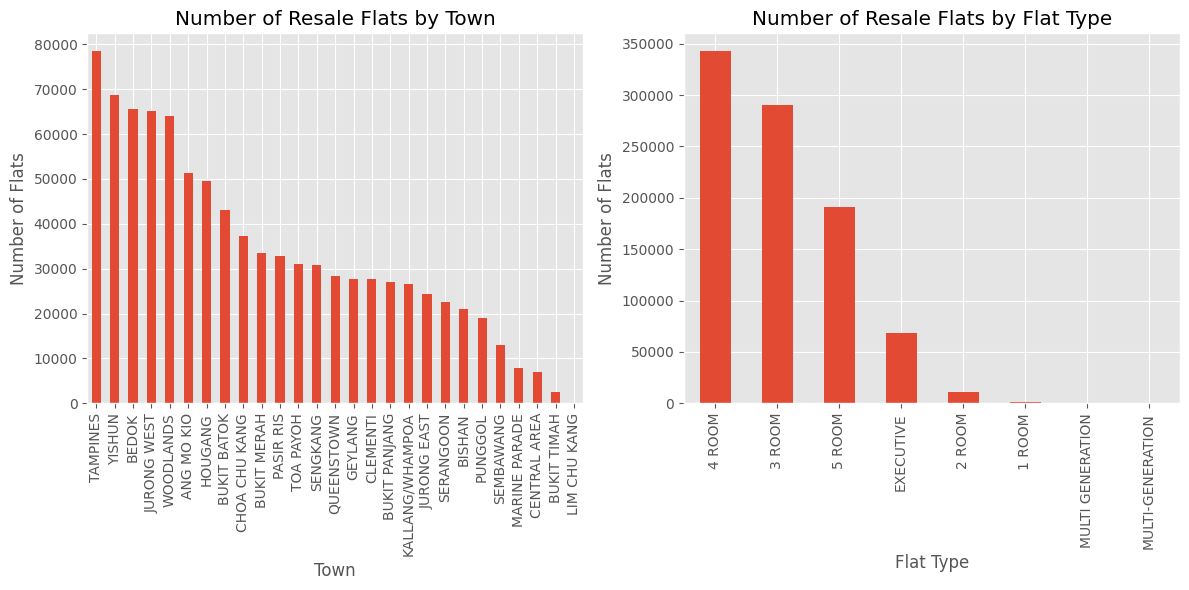

In [40]:
town_counts = merged_df['town'].value_counts()
flat_type_counts = merged_df['flat_type'].value_counts()


fig, axes = plt.subplots(1, 2, figsize=(12, 6))

town_counts.plot(kind='bar', ax=axes[0])
axes[0].set_title('Number of Resale Flats by Town')
axes[0].set_xlabel('Town')
axes[0].set_ylabel('Number of Flats')

flat_type_counts.plot(kind='bar', ax=axes[1])
axes[1].set_title('Number of Resale Flats by Flat Type')
axes[1].set_xlabel('Flat Type')
axes[1].set_ylabel('Number of Flats')


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

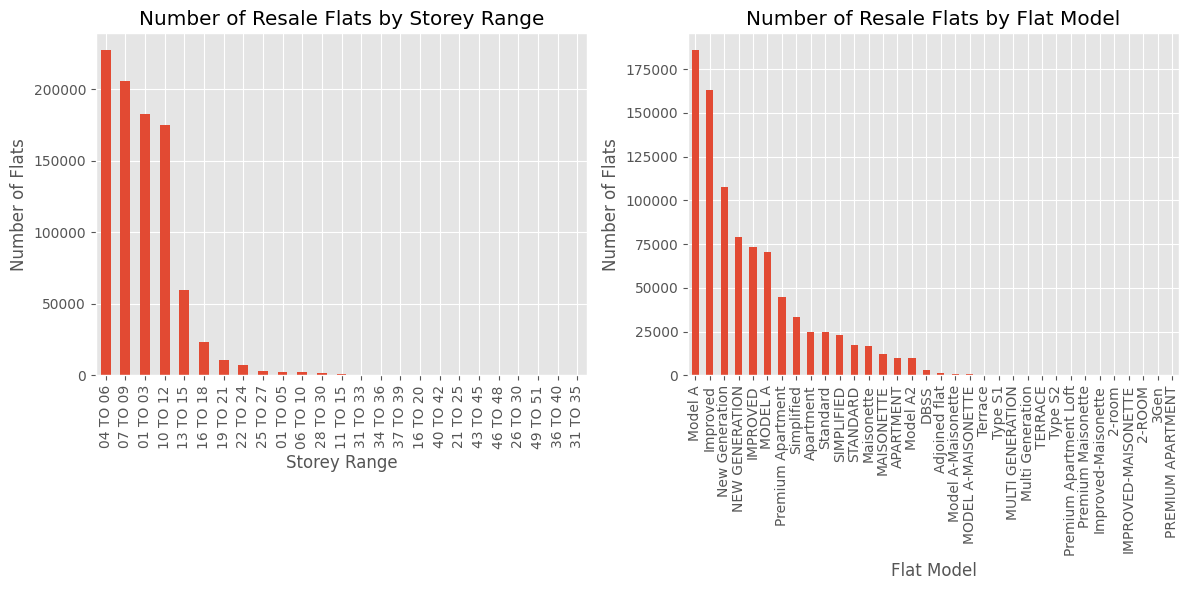

In [41]:
flat_model_counts = merged_df['flat_model'].value_counts()
storey_range_counts = merged_df['storey_range'].value_counts()
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
flat_model_counts.plot(kind='bar', ax=axes[1])
axes[1].set_title('Number of Resale Flats by Flat Model')
axes[1].set_xlabel('Flat Model')
axes[1].set_ylabel('Number of Flats')

storey_range_counts.plot(kind='bar', ax=axes[0])
axes[0].set_title('Number of Resale Flats by Storey Range')
axes[0].set_xlabel('Storey Range')
axes[0].set_ylabel('Number of Flats')


plt.tight_layout()
plt.show()

In [50]:
import plotly
import nbformat
print("Plotly version:", plotly.__version__)
print("nbformat version:", nbformat.__version__)

Plotly version: 5.16.0
nbformat version: 5.9.2


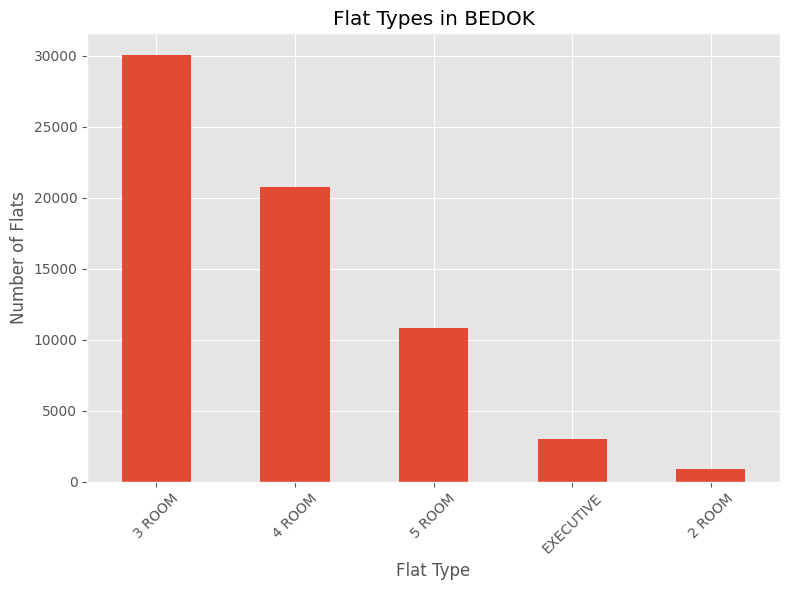

In [54]:
# Choose a specific town
selected_town = 'BEDOK'

# Filter data for the selected town
filtered_df = merged_df[merged_df['town'] == selected_town]

# Count the occurrences of each flat type
flat_type_counts = filtered_df['flat_type'].value_counts()

# Create a bar plot for flat types within the selected town
plt.figure(figsize=(8, 6))
flat_type_counts.plot(kind='bar')
plt.title(f'Flat Types in {selected_town}')
plt.xlabel('Flat Type')
plt.ylabel('Number of Flats')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




town
TAMPINES         78537
YISHUN           68631
BEDOK            65603
JURONG WEST      65194
WOODLANDS        63947
ANG MO KIO       51234
HOUGANG          49466
BUKIT BATOK      43105
CHOA CHU KANG    37348
BUKIT MERAH      33523
Name: count, dtype: int64


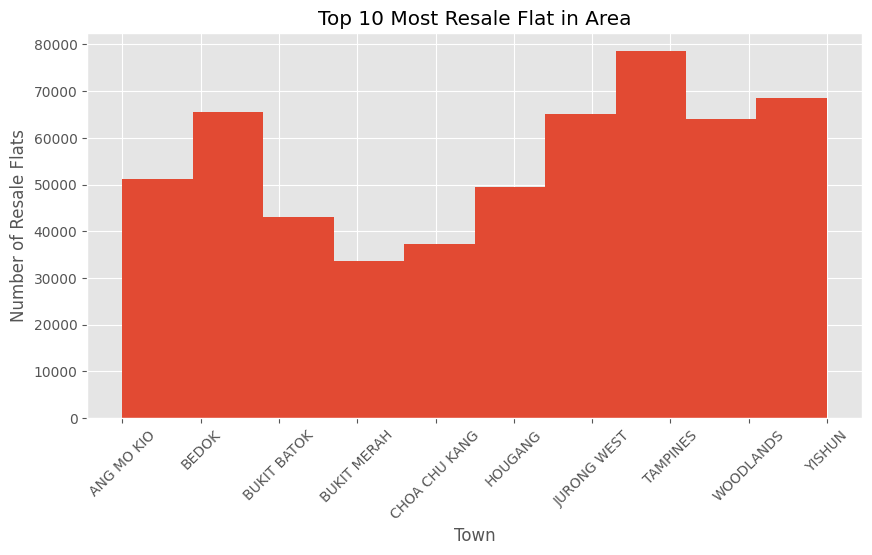

In [31]:
fig = plt.figure(figsize=(10,5))

top_towns = merged_df['town'].value_counts().nlargest(10)

plt.hist(merged_df[merged_df['town'].isin(top_towns.index)]['town'])
plt.xlabel('Town')
plt.ylabel('Number of Resale Flats')
plt.xticks(rotation=45)
plt.title('Top 10 Most Resale Flat in Area')

print(top_towns)

We observed that Tampines has the most number of resale flats in the area.

Converting categorical values to one-hot-encoding for ease in machine learning inputs.

In [31]:
from sklearn.preprocessing import OneHotEncoder

In [32]:
encoded_flat = pd.get_dummies(merged_df['flat_type'], prefix='flat_type').astype(int)
encoded_storey = pd.get_dummies(merged_df['storey_range'], prefix='storey_range').astype(int)
encoded_model = pd.get_dummies(merged_df['flat_model'], prefix='flat_model').astype(int)


In [33]:
merged_df = pd.concat([merged_df, encoded_flat], axis=1)
merged_df = pd.concat([merged_df, encoded_storey], axis=1)
merged_df = pd.concat([merged_df, encoded_model], axis=1)


In [34]:
merged_df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,...,storey_range_28 TO 30,storey_range_31 TO 33,storey_range_31 TO 35,storey_range_34 TO 36,storey_range_36 TO 40,storey_range_37 TO 39,storey_range_40 TO 42,storey_range_43 TO 45,storey_range_46 TO 48,storey_range_49 TO 51
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,...,0,0,0,0,0,0,0,0,0,0
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,...,0,0,0,0,0,0,0,0,0,0
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,...,0,0,0,0,0,0,0,0,0,0
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,...,0,0,0,0,0,0,0,0,0,0
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,...,0,0,0,0,0,0,0,0,0,0


In [36]:
merged_df.drop(['flat_type', 'storey_range', 'flat_model'], axis = 1, inplace = True)

In [37]:
merged_df.head()

,month,town,block,street_name,floor_area_sqm,lease_commence_date,remaining_lease,resale_price,flat_type_1 ROOM,flat_type_2 ROOM,...,storey_range_28 TO 30,storey_range_31 TO 33,storey_range_31 TO 35,storey_range_34 TO 36,storey_range_36 TO 40,storey_range_37 TO 39,storey_range_40 TO 42,storey_range_43 TO 45,storey_range_46 TO 48,storey_range_49 TO 51
0,2017-01-01,ANG MO KIO,406,ANG MO KIO AVE 10,44.0,1979,61 years 04 months,232000.0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2017-01-01,ANG MO KIO,108,ANG MO KIO AVE 4,67.0,1978,60 years 07 months,250000.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2017-01-01,ANG MO KIO,602,ANG MO KIO AVE 5,67.0,1980,62 years 05 months,262000.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017-01-01,ANG MO KIO,465,ANG MO KIO AVE 10,68.0,1980,62 years 01 month,265000.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2017-01-01,ANG MO KIO,601,ANG MO KIO AVE 5,67.0,1980,62 years 05 months,265000.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
merged_df.columns

Index(['month', 'town', 'block', 'street_name', 'floor_area_sqm',
       'lease_commence_date', 'remaining_lease', 'resale_price',
       'flat_type_1 ROOM', 'flat_type_2 ROOM', 'flat_type_3 ROOM',
       'flat_type_4 ROOM', 'flat_type_5 ROOM', 'flat_type_EXECUTIVE',
       'flat_type_MULTI GENERATION', 'flat_type_MULTI-GENERATION',
       'storey_range_01 TO 03', 'storey_range_01 TO 05',
       'storey_range_04 TO 06', 'storey_range_06 TO 10',
       'storey_range_07 TO 09', 'storey_range_10 TO 12',
       'storey_range_11 TO 15', 'storey_range_13 TO 15',
       'storey_range_16 TO 18', 'storey_range_16 TO 20',
       'storey_range_19 TO 21', 'storey_range_21 TO 25',
       'storey_range_22 TO 24', 'storey_range_25 TO 27',
       'storey_range_26 TO 30', 'storey_range_28 TO 30',
       'storey_range_31 TO 33', 'storey_range_31 TO 35',
       'storey_range_34 TO 36', 'storey_range_36 TO 40',
       'storey_range_37 TO 39', 'storey_range_40 TO 42',
       'storey_range_43 TO 45', 'store